Estancia de Investigación Dr. Pastor CIMAT Guanajuato
Junio 2019

Hairo Ulises Miranda Belmonte Cimat Monterrey

hairo.miranda@cimat.mx

Cimat Gto.

# Clasificador CNN básico

In [1]:
import numpy as np 
import pandas as pd 
import re # lidia con expresiones regulares
import nltk
import matplotlib.pyplot as plt   
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize # sentencia en palabras
from nltk.stem import SnowballStemmer # idioma steam
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm



from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Any results you write to the current directory are saved as output.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 


In [2]:
import numpy as np
import pylab as pl
from IPython.display import SVG
from os.path import join, exists, split
import os

from gensim.models import word2vec, KeyedVectors


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding, GlobalMaxPooling1D
from keras.layers.merge import Concatenate
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

Using TensorFlow backend.


In [3]:
import os
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import math

from sklearn.metrics import roc_curve, auc,  f1_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import keras
from sklearn import metrics
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D, Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D, BatchNormalization, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D,CuDNNLSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Bidirectional, GlobalMaxPool1D, TimeDistributed
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [4]:
# con stemming
def review_to_words( raw_review ):
    # 1. Remover todo menos letras y comas        
    letters_only = re.sub('[^\w]\d*',  " ", raw_review) 
    # 2. convertir a mínusculas
    words = letters_only.lower().split()                             
    # 3. remover stopwords
    stops = set(stopwords.words("spanish"))                  
    # 3.1 retirando stopwords
    meaningful_words = [w for w in words if not w in stops]   
    # 4 stemming en español
    stemmer = SnowballStemmer('spanish')
    stemmed_text = [stemmer.stem(i) for i in meaningful_words]
    # 5. uniendo documeto
    return( " ".join( stemmed_text ))  
# sin stemming
def review_to_words2( raw_review ):
    # 1. Remover todo menos letras y comas       
    letters_only = re.sub('[^\w]\d*',  " ", raw_review) 
    # 2. convertir a mínusculas
    words = letters_only.lower().split()                             
    # 3. remover stopwords
    stops = set(stopwords.words("spanish"))                  
    # 3.1 retirando stopwords
    meaningful_words = [w for w in words if not w in stops]   
    return( " ".join( meaningful_words )) 

In [5]:
import gensim
from gensim.models import word2vec, KeyedVectors


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding, GlobalMaxPooling1D
from keras.layers.merge import Concatenate
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

In [6]:
# Load Google's pre-trained Word2Vec model.
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\word2vec Google news')
modelo_google = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## México

In [6]:
# Importando los textos
import os
# introducit path datos de entrenamiento
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-training-20190331')
train = pd.read_csv('irosva.mx.training.csv');
# introducit path datos de prueba
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-test-20190420')
test_nolabel = pd.read_csv('irosva.mx - irosva.mx.test.csv');
# introducit path etiquetas verdaderas de prueba
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-test-truth-20190420')
test_label = pd.read_csv('irosva.mx.test.truth.csv');

test = pd.merge(test_nolabel, test_label, on='ID')
entrenamiento = train["TOPIC"].astype(str).str.cat(train["MESSAGE"].astype(str), sep=' ')
prueba = test["TOPIC_y"].astype(str).str.cat(test["MESSAGE"].astype(str), sep=' ')

x_train = train["MESSAGE"]
x_test = test["MESSAGE"]
y_train = train['IS_IRONIC']
y_test = test['IS_IRONIC_y']

#Limpiando datos de entrenamiento
num = x_train.size
# Lista para guardar twits limpios
clean_train = []
for i in range( 0, num):
    clean_train.append(review_to_words2(x_train.values[i]))
x_train_mx = clean_train

num= x_test.size
clean_test_train = []
for i in range( 0, num):
    clean_test_train.append( review_to_words2(x_test.values[i] ) )
x_test_mx = clean_test_train

x_train_mx = train["TOPIC"].astype(str).str.cat(x_train_mx, sep=' ')
x_test_mx = test["TOPIC_y"].astype(str).str.cat(x_test_mx, sep=' ')

x_test_mx# Datos de entrenamient y de prueba ya pre-procesados

x_train_mx = pd.Series(x_train_mx)
y_train = pd.Series(y_train)
x_test_mx = pd.Series(x_test_mx)
y_test = pd.Series(y_test)

print(x_train_mx.shape)
print(y_train.shape)
print(x_test_mx.shape)
print(y_test.shape)

(2400,)
(2400,)
(600,)
(600,)


In [7]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate


# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the maximum document length
def max_length(lines):
	return max([len(s.split()) for s in lines])

# encode a list of lines
def encode_text(tokenizer, lines, length):
	# integer encode
	encoded = tokenizer.texts_to_sequences(lines)
	# pad encoded sequences
	padded = pad_sequences(encoded, maxlen=length, padding='post')
	return padded


In [8]:
# create tokenizer
tokenizer_mx = create_tokenizer(x_train_mx)
# calculate max document length
length_mx = max_length(x_train_mx)
# calculate vocabulary size
vocab_size_mx = len(tokenizer_mx.word_index) + 1
print('Max document length México: %d' % length_mx)
print('Vocabulary size México: %d' % vocab_size_mx)

# encode data
trainX_mx = encode_text(tokenizer_mx, x_train_mx, length_mx)
print(trainX_mx.shape)


testX_mx = encode_text(tokenizer_mx, x_test_mx, length_mx)
print(testX_mx.shape)

Max document length México: 36
Vocabulary size México: 8281
(2400, 36)
(600, 36)


In [9]:
tokenizer_mx.word_index
vocabulary_inv_mx = dict((v, k) for k, v in tokenizer_mx.word_index.items())
vocabulary_inv_mx[0] = "<PAD/>"


In [11]:
# pesos 
embedding_weights_mx = {key: modelo_google[word] if word in modelo_google else
                          np.random.uniform(-0.25, 0.25, modelo_google.vector_size)
                     for key, word in vocabulary_inv_mx.items()}

weights_mx = np.array([embedding_weights_mx[i] for i in range(len(embedding_weights_mx))])

## España

In [11]:
# Importando los textos
import os
# introducit path datos de entrenamiento
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-training-20190331')
train_es = pd.read_csv('irosva.es.training.csv');
# introducit path datos de prueba
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-test-20190420')
test_nolabel_es = pd.read_csv('irosva.es - irosva.es.test.csv');
# introducit path etiquetas verdaderas de prueba
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-test-truth-20190420')
test_label_es = pd.read_csv('irosva.es.test.truth.csv');

test_es = pd.merge(test_nolabel_es, test_label_es, on='ID')

x_train_es = train_es["MESSAGE"]
x_test_es = test_es["MESSAGE"]
y_train_es = train_es['IS_IRONIC']
y_test_es = test_es['IS_IRONIC_y']

#Limpiando datos de entrenamiento
num = x_train_es.size
# Lista para guardar twits limpios
clean_train = []
for i in range( 0, num):
    clean_train.append(review_to_words(x_train_es.values[i]))
x_train_es = clean_train

num= x_test_es.size
clean_test_train = []
for i in range( 0, num):
    clean_test_train.append( review_to_words(x_test_es.values[i] ) )
x_test_es= clean_test_train

x_train_es = train_es["TOPIC"].astype(str).str.cat(x_train_es, sep=' ')
x_test_es = test_es["TOPIC_y"].astype(str).str.cat(x_test_es, sep=' ')

x_test_mx# Datos de entrenamient y de prueba ya pre-procesados

x_train_es= pd.Series(x_train_es)
y_train_es = pd.Series(y_train_es)
x_test_es = pd.Series(x_test_es)
y_test_es = pd.Series(y_test_es)

print(x_train_es.shape)
print(y_train_es.shape)
print(x_test_es.shape)
print(y_test_es.shape)


(2400,)
(2400,)
(600,)
(600,)


In [12]:
# create tokenizer
tokenizer_es = create_tokenizer(x_train_es)
# calculate max document length
length_es = max_length(x_train_es)
# calculate vocabulary size
vocab_size_es = len(tokenizer_es.word_index) + 1
print('Max document length España: %d' % length_es)
print('Vocabulary size España: %d' % vocab_size_es)

# encode data
trainX_es = encode_text(tokenizer_es, x_train_es, length_es)
print(trainX_es.shape)


testX_es = encode_text(tokenizer_es, x_test_es, length_es)
print(testX_es.shape)

tokenizer_es.word_index
vocabulary_inv_es = dict((v, k) for k, v in tokenizer_es.word_index.items())
vocabulary_inv_es[0] = "<PAD/>"



Max document length España: 38
Vocabulary size España: 6995
(2400, 38)
(600, 38)


In [ ]:
# pesos 
embedding_weights_es = {key: modelo_google[word] if word in modelo_google else
                          np.random.uniform(-0.25, 0.25, modelo_google.vector_size)
                     for key, word in vocabulary_inv_es.items()}

weights_es = np.array([embedding_weights_es[i] for i in range(len(embedding_weights_es))])

## Cuba

In [13]:
# Importando los textos
import os
# introducit path datos de entrenamiento
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-training-20190331')
train_cu = pd.read_csv('irosva.cu.training.csv');
# introducit path datos de prueba
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-test-20190420')
test_nolabel_cu = pd.read_csv('irosva.cu - irosva.cu.test.csv');
# introducit path etiquetas verdaderas de prueba
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-test-truth-20190420')
test_label_cu = pd.read_csv('irosva.cu.test.truth.csv');

test_cu = pd.merge(test_nolabel_cu, test_label_cu, on='ID')

x_train_cu = train_cu["MESSAGE"]
x_test_cu = test_cu["MESSAGE"]
y_train_cu = train_cu['IS_IRONIC']
y_test_cu = test_cu['IS_IRONIC_y']

#Limpiando datos de entrenamiento
num = x_train_cu.size
# Lista para guardar twits limpios
clean_train = []
for i in range( 0, num):
    clean_train.append(review_to_words2(x_train_cu.values[i]))
x_train_cu = clean_train

num= x_test_cu.size
clean_test_train = []
for i in range( 0, num):
    clean_test_train.append( review_to_words2(x_test_cu.values[i] ) )
x_test_cu= clean_test_train

x_train_cu = train_cu["TOPIC"].astype(str).str.cat(x_train_cu, sep=' ')
x_test_cu = test_cu["TOPIC_y"].astype(str).str.cat(x_test_cu, sep=' ')

x_test_mx# Datos de entrenamient y de prueba ya pre-procesados

x_train_cu= pd.Series(x_train_cu)
y_train_cu = pd.Series(y_train_cu)
x_test_cu = pd.Series(x_test_cu)
y_test_cu = pd.Series(y_test_cu)

print(x_train_cu.shape)
print(y_train_cu.shape)
print(x_test_cu.shape)
print(y_test_cu.shape)

(2400,)
(2400,)
(600,)
(600,)


In [14]:
# create tokenizer
tokenizer_cu = create_tokenizer(x_train_cu)
# calculate max document length
length_cu = max_length(x_train_cu)
# calculate vocabulary size
vocab_size_cu = len(tokenizer_cu.word_index) + 1
print('Max document length Cuba: %d' % length_cu)
print('Vocabulary size Cuba: %d' % vocab_size_cu)

# encode data
trainX_cu = encode_text(tokenizer_cu, x_train_cu, length_cu)
print(trainX_cu.shape)


testX_cu = encode_text(tokenizer_cu, x_test_cu, length_cu)
print(testX_cu.shape)

tokenizer_cu.word_index
vocabulary_inv_cu = dict((v, k) for k, v in tokenizer_cu.word_index.items())
vocabulary_inv_cu[0] = "<PAD/>"



Max document length Cuba: 41
Vocabulary size Cuba: 9304
(2400, 41)
(600, 41)


In [ ]:
# pesos 
embedding_weights_cu = {key: modelo_google[word] if word in modelo_google else
                          np.random.uniform(-0.25, 0.25, modelo_google.vector_size)
                     for key, word in vocabulary_inv_cu.items()}

weights_cu = np.array([embedding_weights_cu[i] for i in range(len(embedding_weights_cu))])

In [16]:
del modelo_google

### Clasificador CNN México

In [10]:
# one hot representación targets
from keras.utils import to_categorical
y_train_label_mx = to_categorical(y_train)
y_test_label_mx  = to_categorical(y_test)

In [16]:
# define the model
def define_model_mx1(length, vocab_size, n ):
    


	# channel 1
	np.random.seed(n)
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 300)(inputs1)
	conv1 = Conv1D(filters=100, kernel_size=4, activation='relu')(embedding1)
	pool1 = GlobalMaxPooling1D()(conv1)
	drop1 = Dropout(0.5)(pool1) 
	# interpretation
	dense1 = Dense(10, activation='relu')(drop1)
	outputs = Dense(2, activation='softmax')(dense1)
	model = Model(inputs1, outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	
	return model

In [17]:
from sklearn.utils import class_weight
class_weights_mx = class_weight.compute_class_weight('balanced',
                                                 np.unique(array(y_train_label_mx)),
                                                 y_train)

In [38]:
del model_mx, hist_mx

In [18]:
model_mx = define_model_mx1(length_mx, vocab_size_mx, 16) #16
# fit model


hist_mx = model_mx.fit(trainX_mx,  array(y_train_label_mx), epochs=6, batch_size=50, validation_split=.2, class_weight= class_weights_mx)


W0710 11:55:10.738850  7060 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 11:55:10.750820  7060 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 11:55:10.752815  7060 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 11:55:10.780740  7060 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 36)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 36, 300)           2484300   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 33, 100)           120100    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total para

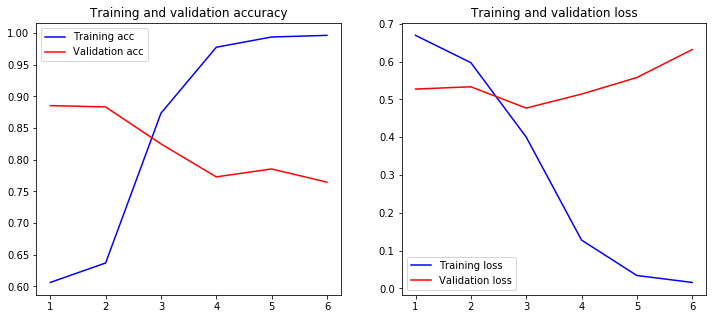

In [19]:

def plot_history(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, "b", label="Training acc")
        plt.plot(x, val_acc, "r", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, "b", label="Training loss")
        plt.plot(x, val_loss, "r", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()
    
plot_history(history=hist_mx)


[[311  90]
 [ 99 100]]
F1 test: 0.6405465973963402


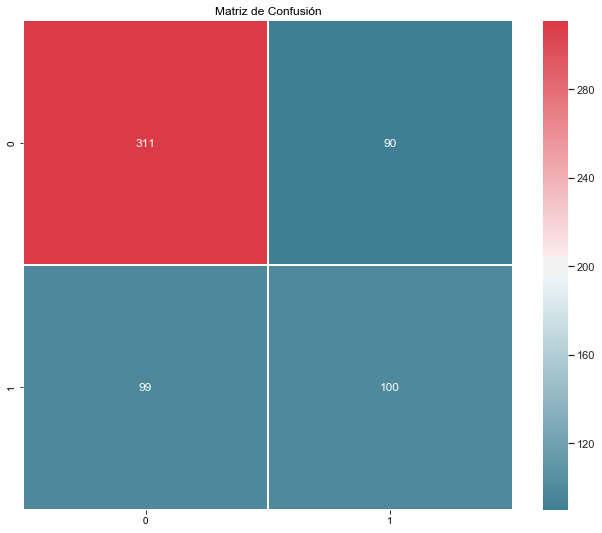

In [12]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_mx = model_mx.predict(testX_mx)

test_true_labels_mx      = np.argmax(y_test_label_mx, axis=1)
test_predicted_labels_mx = np.argmax(y_predict_mx,axis=1)


%matplotlib inline
C = confusion_matrix(test_true_labels_mx, test_predicted_labels_mx)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_mx, test_predicted_labels_mx,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()


#F1 test:  0.6405465973963402 16semillas,6 epocas

In [11]:
from keras.models import load_model
DATA_PATH='C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\'
#model_mx.save(DATA_PATH+'Cnn_mx_basico.h5')

model_mx = load_model(DATA_PATH+'Cnn_mx_basico.h5') # Cargar

W0711 12:14:43.745559 16644 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 12:14:43.991924 16644 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 12:14:44.194498 16644 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 12:14:44.194498 16644 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.

### CNN-SVM

En proceso...


In [50]:
model_feat = Model(inputs=model_mx.input,outputs=model_mx.get_layer('global_max_pooling1d_1').output)

feat_train = model_feat.predict(trainX_mx)
print(feat_train.shape)

feat_test = model_feat.predict(testX_mx)
print(feat_test.shape)


(2400, 10)
(600, 10)


In [51]:
del svm_mx

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import time
tic=time.time()

SVCpipe = Pipeline([('SVC',LinearSVC(class_weight="balanced", random_state=1,verbose=0, max_iter=5000))])

# Gridsearch to determine the value of C
param_grid = {'SVC__C':np.arange(1,15,1)}
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True, verbose=0)
linearSVC.fit(feat_train, np.argmax(y_train_label_mx, axis=1))
print(linearSVC.best_params_)
#linearSVC.coef_
#linearSVC.intercept_

svm_mx = linearSVC.best_estimator_
svm_mx.fit(feat_train, np.argmax(y_train_label_mx, axis=1))

    
print('Tiempo de procesamiento (secs): ', time.time()-tic)

C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarni

C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'SVC__C': 8}
Tiempo de procesamiento (secs):  8.855379819869995


C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[334  67]
 [122  77]]
F1 test: 0.6142214178553569


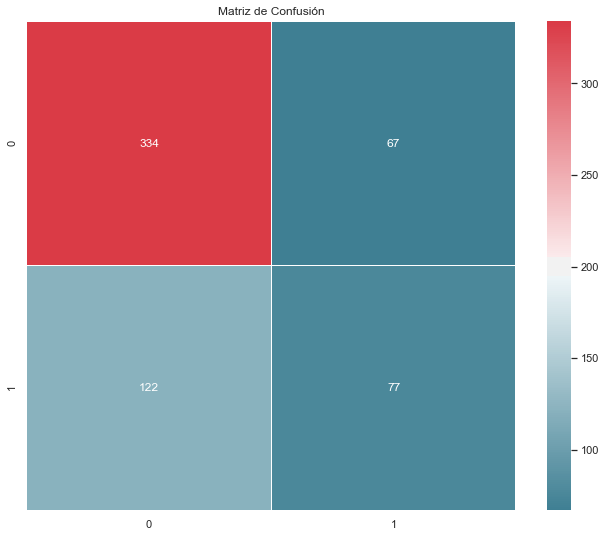

In [54]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_mx = svm_mx.predict(feat_test)

test_true_labels_mx      = np.argmax(y_test_label_mx, axis=1)
test_predicted_labels_mx = y_predict_mx


%matplotlib inline
C = confusion_matrix(test_true_labels_mx, test_predicted_labels_mx)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_mx, test_predicted_labels_mx,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()


#F1 test:  0.6405465973963402 16semillas,6 epocas

In [22]:

from keras.utils.vis_utils import plot_model
plot_model(model_mx, show_shapes=True, to_file=DATA_PATH+'Cnn_mx_basico.png')

### Clasificador España

In [23]:
# one hot representación targets
from keras.utils import to_categorical
y_train_label_es = to_categorical(y_train_es)
y_test_label_es  = to_categorical(y_test_es)

In [24]:
# define the model
def define_model_es1(length, vocab_size, n ):
	# channel 1
	np.random.seed(n)
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 300)(inputs1)
	conv1 = Conv1D(filters=100, kernel_size=4, activation='relu')(embedding1)
	pool1 = GlobalMaxPooling1D()(conv1)
	drop1 = Dropout(0.5)(pool1) 
	# interpretation
	dense1 = Dense(10, activation='relu')(drop1)
	outputs = Dense(2, activation='softmax')(dense1)
	model = Model(inputs1, outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	
	return model

In [25]:
from sklearn.utils import class_weight
class_weights_es = class_weight.compute_class_weight('balanced',
                                                np.unique(array(y_train_label_es)),
                                                 y_train_es)

In [77]:
del model_es, hist_es

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 38)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 38, 300)           2098500   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 35, 100)           120100    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total para

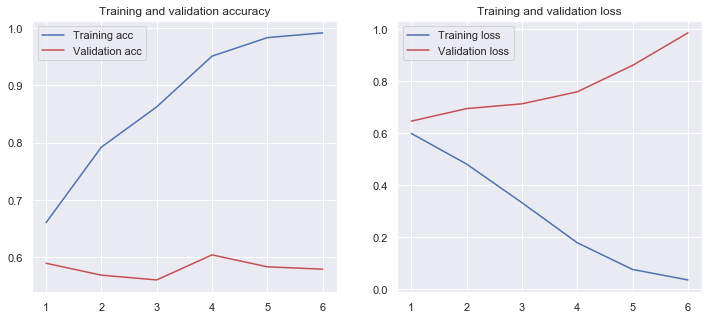

In [26]:
model_es = define_model_es1(length_es, vocab_size_es, 17) 
# fit model


hist_es = model_es.fit(trainX_es, array(y_train_label_es), epochs = 6, batch_size=50, validation_split=.2, class_weight = class_weights_es)

def plot_history(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, "b", label="Training acc")
        plt.plot(x, val_acc, "r", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, "b", label="Training loss")
        plt.plot(x, val_loss, "r", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()
    
plot_history(history=hist_es)

[[337  63]
 [109  91]]
F1 test: 0.6554073005569581


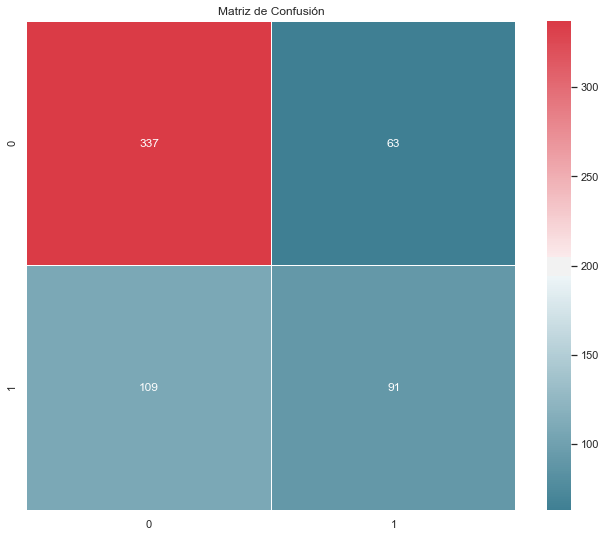

In [27]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_es = model_es.predict(testX_es)

test_true_labels_es      = np.argmax(y_test_label_es, axis=1)
test_predicted_labels_es = np.argmax(y_predict_es,axis=1)


%matplotlib inline
C = confusion_matrix(test_true_labels_es, test_predicted_labels_es)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_es, test_predicted_labels_es,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()

# F1 test:0.6554073005569581 seed 17 epoca 6

In [28]:
from keras.models import load_model
DATA_PATH='C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\'
model_es.save(DATA_PATH+'Cnn_es_basico.h5')

#model_es = load_model(DATA_PATH+'Cnn_es_basico.h5') # Cargar

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model_es, show_shapes=True, to_file=DATA_PATH+'Cnn_es_basico.png')

### Clasificación Cuba

In [30]:
# one hot representación targets
from keras.utils import to_categorical
y_train_label_cu = to_categorical(y_train_cu)
y_test_label_cu  = to_categorical(y_test_cu)

In [31]:
# define the model
def define_model_cu1(length, vocab_size, n ):
	# channel 1
	np.random.seed(n)
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 300)(inputs1)
	conv1 = Conv1D(filters=100, kernel_size=4, activation='relu')(embedding1)
	pool1 = GlobalMaxPooling1D()(conv1)
	drop1 = Dropout(0.5)(pool1) 
	# interpretation
	dense1 = Dense(10, activation='relu')(drop1)
	outputs = Dense(2, activation='sigmoid')(dense1)
	model = Model(inputs1, outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	
	
	return model

In [32]:
from sklearn.utils import class_weight
class_weights_cu = class_weight.compute_class_weight('balanced',
                                                np.unique(array(y_train_label_cu)),
                                                 y_train_cu)

In [32]:
del model_cu, hist_cu

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 41)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 41, 300)           2791200   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 38, 100)           120100    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 22        
Total para

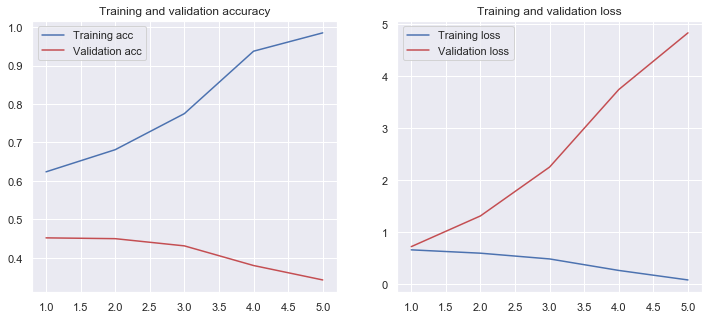

In [33]:
model_cu = define_model_cu1(length_cu, vocab_size_cu, 17) 
# fit model


hist_cu = model_cu.fit(trainX_cu, array(y_train_label_cu), epochs=5, batch_size=50, validation_split=.2, class_weight = class_weights_cu)

def plot_history(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, "b", label="Training acc")
        plt.plot(x, val_acc, "r", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, "b", label="Training loss")
        plt.plot(x, val_loss, "r", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()
    
plot_history(history=hist_cu)

[[281 119]
 [119  81]]
F1 test: 0.55375


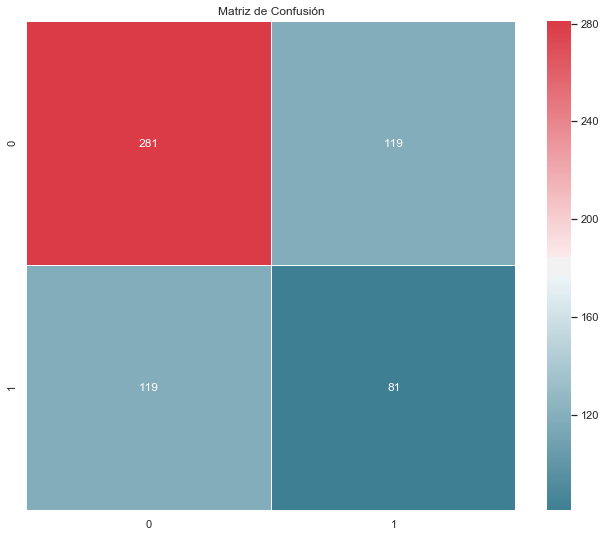

In [34]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_cu = model_cu.predict(testX_cu)

test_true_labels_cu      = np.argmax(y_test_label_cu, axis=1)
test_predicted_labels_cu = np.argmax(y_predict_cu,axis=1)


%matplotlib inline
C = confusion_matrix(test_true_labels_cu, test_predicted_labels_cu)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_cu, test_predicted_labels_cu,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')


plt.show()

# F1 test 0.55375 seed 17 epoca 5

In [35]:
from keras.models import load_model
DATA_PATH='C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\'
model_cu.save(DATA_PATH+'Cnn_cu_basico.h5')

#model_cu = load_model(DATA_PATH+'Cnn_cu_basico.h5') # Cargar

In [36]:
from keras.utils.vis_utils import plot_model
plot_model(model_cu, show_shapes=True, to_file=DATA_PATH+'Cnn_cu_basico.png')

# Clasificador LSTM

 ### México

In [40]:

np.random.seed(50)
inputs = Input(name='inputs',shape=[length_mx])
np.random.seed(50)
layer = Embedding(vocab_size_mx,300, input_length=length_mx)(inputs)
layer = LSTM(64,  return_sequences=False)(layer)
layer = Dense(256, activation= 'relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(2, activation= 'softmax')(layer)
model_lstm_mx = Model(inputs=inputs,outputs=layer)
    model_lstm_mx.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm_mx.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 36)                0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 36, 300)           2484300   
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 514       
Total params: 2,594,894
Trainable params: 2,594,894
Non-trainable params: 0
_________________________________________________________________


In [39]:
del model_lstm_mx, history_lstm_mx

In [41]:

from sklearn.utils import class_weight
class_weights_mx = class_weight.compute_class_weight('balanced',
                                                np.unique(array(y_train_label_mx)),
                                                 y_train)


history_lstm_mx = model_lstm_mx.fit(trainX_mx, y_train_label_mx,batch_size=50,epochs=5, validation_split=0.2, class_weight = class_weights_mx)




Train on 1920 samples, validate on 480 samples
Epoch 1/5
1920/1920 [==============================] - 6s 3ms/step - loss: 0.6733 - acc: 0.6031 - val_loss: 0.5866 - val_acc: 0.8854
Epoch 2/5
1920/1920 [==============================] - 4s 2ms/step - loss: 0.6669 - acc: 0.6120 - val_loss: 0.5837 - val_acc: 0.8854
Epoch 3/5
1920/1920 [==============================] - 4s 2ms/step - loss: 0.6472 - acc: 0.6047 - val_loss: 0.5555 - val_acc: 0.5667
Epoch 4/5
1920/1920 [==============================] - 4s 2ms/step - loss: 0.4611 - acc: 0.7677 - val_loss: 0.6095 - val_acc: 0.6875
Epoch 5/5
1920/1920 [==============================] - 4s 2ms/step - loss: 0.2790 - acc: 0.8880 - val_loss: 0.9109 - val_acc: 0.6958


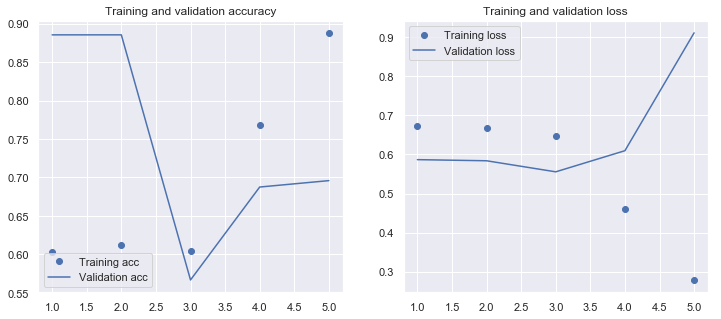

In [47]:
def plot_history(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, "bo", label="Training acc")
        plt.plot(x, val_acc, "b", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, "bo", label="Training loss")
        plt.plot(x, val_loss, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()
    
plot_history(history=history_lstm_mx)



[[294 107]
 [ 84 115]]
F1 test: 0.6505660768571682


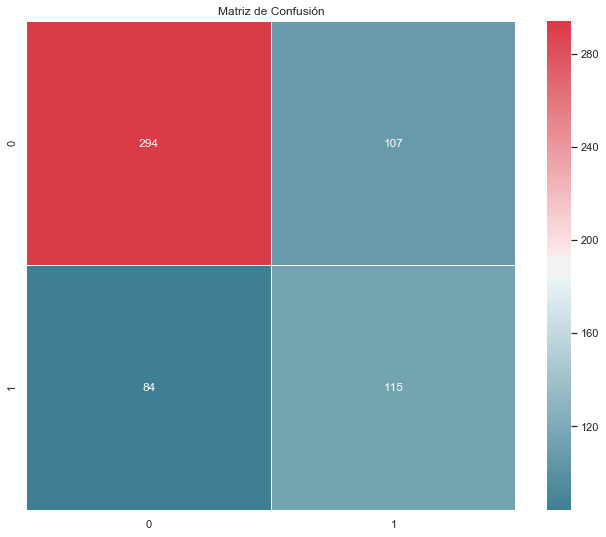

In [38]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_mx = model_lstm_mx.predict(testX_mx)

test_true_labels_mx_lstm      = np.argmax(y_test_label_mx, axis=1)
test_predicted_labels_mx_lstm = np.argmax(y_predict_mx,axis=1)


%matplotlib inline
C = confusion_matrix(test_true_labels_mx_lstm, test_predicted_labels_mx_lstm)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_mx_lstm, test_predicted_labels_mx_lstm,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()

#   0.6505660768571682

In [37]:
from keras.models import load_model
DATA_PATH='C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\'
#model_lstm_mx.save(DATA_PATH+'LSTM_mx.h5')

model_lstm_mx = load_model(DATA_PATH+'LSTM_mx.h5') # Cargar

In [44]:
print("Número de epocas", len(history_lstm_mx.epoch))

Número de epocas 5


In [45]:
from keras.utils.vis_utils import plot_model
plot_model(model_lstm_mx, show_shapes=True, to_file=DATA_PATH+'LSTM_mx.png')

### España

In [86]:

np.random.seed(50)
inputs = Input(name='inputs',shape=[length_es])
np.random.seed(50)
layer = Embedding(vocab_size_es,300, input_length=length_es)(inputs)
layer = LSTM(64,  return_sequences=False)(layer)
layer = Dense(256, activation= 'relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(2, activation= 'softmax')(layer)
model_lstm_es = Model(inputs=inputs,outputs=layer)
model_lstm_es.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm_es.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 38)                0         
_________________________________________________________________
embedding_14 (Embedding)     (None, 38, 300)           2098500   
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                93440     
_________________________________________________________________
dense_27 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 514       
Total params: 2,209,094
Trainable params: 2,209,094
Non-trainable params: 0
_________________________________________________________________


In [85]:
del model_lstm_es, history_lstm_es

In [87]:
from sklearn.utils import class_weight
class_weights_es = class_weight.compute_class_weight('balanced',
                                                np.unique(array(y_train_label_es)),
                                                 y_train_es)


history_lstm_es = model_lstm_es.fit(trainX_es, y_train_label_es,batch_size=50,epochs=7, validation_split=0.2, 
                                    class_weight = class_weights_es)




Train on 1920 samples, validate on 480 samples
Epoch 1/7
1920/1920 [==============================] - 8s 4ms/step - loss: 0.6444 - acc: 0.6615 - val_loss: 0.6411 - val_acc: 0.6604
Epoch 2/7
1920/1920 [==============================] - 4s 2ms/step - loss: 0.6366 - acc: 0.6667 - val_loss: 0.6399 - val_acc: 0.6604
Epoch 3/7
1920/1920 [==============================] - 4s 2ms/step - loss: 0.5328 - acc: 0.7484 - val_loss: 0.8674 - val_acc: 0.5250
Epoch 4/7
1920/1920 [==============================] - 4s 2ms/step - loss: 0.3551 - acc: 0.8797 - val_loss: 0.8583 - val_acc: 0.5250
Epoch 5/7
1920/1920 [==============================] - 4s 2ms/step - loss: 0.2459 - acc: 0.9234 - val_loss: 1.0444 - val_acc: 0.5438
Epoch 6/7
1920/1920 [==============================] - 4s 2ms/step - loss: 0.1315 - acc: 0.9630 - val_loss: 0.9176 - val_acc: 0.5979
Epoch 7/7
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0728 - acc: 0.9839 - val_loss: 1.2350 - val_acc: 0.6250


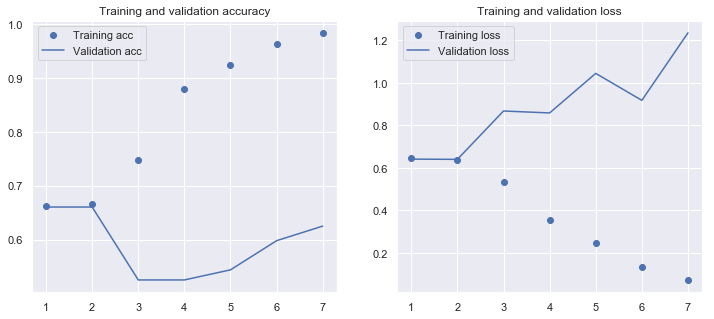

In [88]:
def plot_history(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, "bo", label="Training acc")
        plt.plot(x, val_acc, "b", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, "bo", label="Training loss")
        plt.plot(x, val_loss, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()
    
plot_history(history=history_lstm_es)


[[348  52]
 [113  87]]
F1 test: 0.6608183528105824


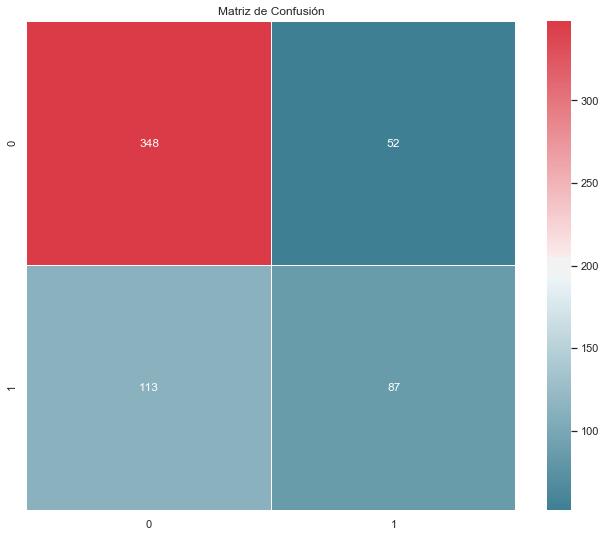

In [40]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_es = model_lstm_es.predict(testX_es)

test_true_labels_es_lstm      = np.argmax(y_test_label_es, axis=1)
test_predicted_labels_es_lstm = np.argmax(y_predict_es,axis=1)


%matplotlib inline
C = confusion_matrix(test_true_labels_es_lstm, test_predicted_labels_es_lstm)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_es_lstm, test_predicted_labels_es_lstm,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()

# 0.6608183528105824 # 7 epocas

In [39]:
from keras.models import load_model
DATA_PATH='C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\'
#model_lstm_es.save(DATA_PATH+'LSTM_es.h5')

model_lstm_es = load_model(DATA_PATH+'LSTM_es.h5') # Cargar

In [91]:
print("Número de epocas", len(history_lstm_es.epoch))

Número de epocas 7


In [92]:
from keras.utils.vis_utils import plot_model
plot_model(model_lstm_es, show_shapes=True, to_file=DATA_PATH+'LSTM_es.png')

### Cuba

In [123]:

np.random.seed(50)
inputs = Input(name='inputs',shape=[length_cu])
np.random.seed(50)
layer = Embedding(vocab_size_cu,300, input_length=length_cu)(inputs)
layer = LSTM(64,  return_sequences=False)(layer)
layer = Dense(256, activation= 'relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(2, activation= 'softmax')(layer)
model_lstm_cu = Model(inputs=inputs,outputs=layer)
model_lstm_cu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm_cu.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 41)                0         
_________________________________________________________________
embedding_20 (Embedding)     (None, 41, 300)           2791200   
_________________________________________________________________
lstm_20 (LSTM)               (None, 64)                93440     
_________________________________________________________________
dense_39 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 2)                 514       
Total params: 2,901,794
Trainable params: 2,901,794
Non-trainable params: 0
_________________________________________________________________


In [122]:
del model_lstm_cu, history_lstm_cu

In [124]:
from sklearn.utils import class_weight
class_weights_cu = class_weight.compute_class_weight('balanced',
                                                np.unique(array(y_train_label_cu)),
                                                 y_train_cu)


history_lstm_cu = model_lstm_cu.fit(trainX_cu, y_train_label_cu,batch_size=50,epochs=6, validation_split=0.2, 
                                    class_weight = class_weights_cu)



Train on 1920 samples, validate on 480 samples
Epoch 1/6
1920/1920 [==============================] - 6s 3ms/step - loss: 0.6603 - acc: 0.6354 - val_loss: 0.5802 - val_acc: 0.7583
Epoch 2/6
1920/1920 [==============================] - 3s 1ms/step - loss: 0.6531 - acc: 0.6438 - val_loss: 0.5669 - val_acc: 0.7583
Epoch 3/6
1920/1920 [==============================] - 3s 1ms/step - loss: 0.6277 - acc: 0.6677 - val_loss: 1.3042 - val_acc: 0.4417
Epoch 4/6
1920/1920 [==============================] - 3s 1ms/step - loss: 0.3724 - acc: 0.8531 - val_loss: 2.6823 - val_acc: 0.3813
Epoch 5/6
1920/1920 [==============================] - 3s 1ms/step - loss: 0.1422 - acc: 0.9516 - val_loss: 3.9178 - val_acc: 0.3458
Epoch 6/6
1920/1920 [==============================] - 3s 1ms/step - loss: 0.0491 - acc: 0.9870 - val_loss: 3.2887 - val_acc: 0.3750


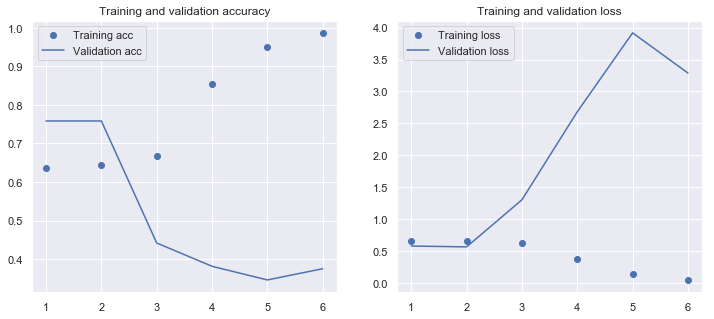

In [125]:
def plot_history(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, "bo", label="Training acc")
        plt.plot(x, val_acc, "b", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, "bo", label="Training loss")
        plt.plot(x, val_loss, "b", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()
    
plot_history(history=history_lstm_cu)

[[279 121]
 [114  86]]
F1 test: 0.5631307106716943


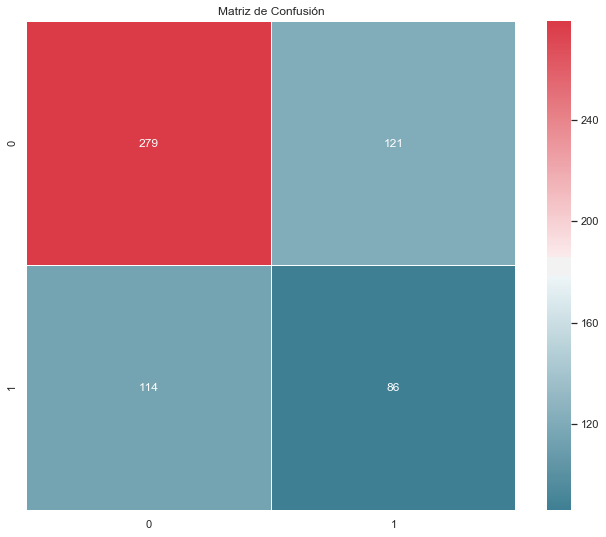

In [42]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_cu = model_lstm_cu.predict(testX_cu)

test_true_labels_cu_lstm      = np.argmax(y_test_label_cu, axis=1)
test_predicted_labels_cu_lstm = np.argmax(y_predict_cu,axis=1)


%matplotlib inline
C = confusion_matrix(test_true_labels_cu_lstm, test_predicted_labels_cu_lstm)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_cu_lstm, test_predicted_labels_cu_lstm,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()

#  0.5631307106716943  6 epocas

In [41]:
from keras.models import load_model
DATA_PATH='C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\'
#model_lstm_cu.save(DATA_PATH+'LSTM_cu.h5')

model_lstm_cu = load_model(DATA_PATH+'LSTM_cu.h5') # Cargar

In [128]:
print("Número de epocas", len(history_lstm_cu.epoch))

Número de epocas 6


In [129]:
from keras.utils.vis_utils import plot_model
plot_model(model_lstm_cu, show_shapes=True, to_file=DATA_PATH+'LSTM_cu.png')

# Resultados

In [43]:
Tabla= {'País':['México', 'España', 'Cuba'],
        'CNN_chanel1':[f1_score(test_true_labels_mx, test_predicted_labels_mx,  average='macro'), 
                    f1_score(test_true_labels_es, test_predicted_labels_es,  average='macro'), 
                      f1_score(test_true_labels_cu, test_predicted_labels_cu,  average='macro')],
        'LSTM':[f1_score(test_true_labels_mx_lstm, test_predicted_labels_mx_lstm,  average='macro'), 
                    f1_score(test_true_labels_es_lstm, test_predicted_labels_es_lstm,  average='macro'), 
                      f1_score(test_true_labels_cu_lstm, test_predicted_labels_cu_lstm,  average='macro')]}
 
# Create DataFrame
Tabla = pd.DataFrame(Tabla)
Tabla

,País,CNN_chanel1,LSTM
0,México,0.640547,0.650566
1,España,0.655407,0.660818
2,Cuba,0.553750,0.563131


https://www.kaggle.com/kredy10/simple-lstm-for-text-classification